# Лабораторная работа №1
## Решение краевых задач методом разностных аппроксимаций
### Вариант 19
*Задание.* Составить разностную схему и получить численное решение краевой задачи с точностью $10^{-3}$.

- $y''+(1+x^2)y=-1, -1\le x\le -1, y(-1)=y(1)=0$

- $ay''+(1+bx^2)y=-1, -1\le x\le -1, y(-1)=y(1)=0, a=sin(19), b=cos(19)$

In [15]:
# importing necessary libraries

import numpy as np
import scipy as sp
from scipy import sparse
import matplotlib.pyplot as plt

In [16]:
# variant number
K = 19

Напишем функцию, решающую линейную краевую задачу вида $y''-p(x)y=f(x), p(x)>0, a \le x \le b,  y(a)=A, y(b)=B$.

Раздедим отрезок $[a,b]$ на $n=\frac{b-a}{h}$ частей. Заменим $y''(x_k)=\frac{y_{k+1}-2y_k+y_{k-1}}{h^2}, k=1,n-1.$
Получаем $y_{k+1}-(2+h^2p(x_k))y_k+y_{k-1}=h^2f(x_k), k=1,n-1$.

Получили трехдиагональную систему из $n-1$ уравнений с $n-1$ неизвестными. Решая систему методом прогонки, найдем приближенное решение краевой задачи.

In [17]:
def solve_de(px, fx, a, b, n=2000):
    h = (b - a) / n
    X = np.linspace(a, b, n + 1) # строим сетку иксов
    P = px(X)
    
    # data содержит три вектора: 
    # первый - значения диагонали ниже главной; 
    # второй - значения главной диагонали;
    # третий - значения диагонали выше главной.

    data = np.array([[1] * (n-1), [-(h * h * P[i] + 2) for i in range(1, n)], [1] * (n - 1)])
    
    offsets = [-1, 0, 1]               # отступы относительно главной диагонали
    
    # строим трехдиагональную матрицу
    M = sparse.dia_matrix((data, offsets), shape=(n - 1, n - 1)).toarray()
    M = np.insert(M, 0, np.array([0] * (n - 1)), 0)
    M = np.insert(M, n, np.array([0] * (n - 1)), 0)
    M = np.insert(M, 0, np.array([1, 1] + [0] * (n - 1)), 1)
    M = np.insert(M, n, np.array([0] * (n - 1) + [1, 1]), 1)
    print(M)
    
    F = fx(X) * h * h
    F[0] = 0
    F[-1] = 0
    
    print(F)
    solution = np.linalg.solve(M, F)
    return X, solution

Найдем $p(x)$ и $f(x)$ для первого случая.

Очевидно, что $p(x)=-(1+x^2)$, $f(x)=-1$.

In [18]:
def px1(x):
    return - 1 - x * x

In [19]:
def fx1(x):
    return -1 + (x - x);

In [20]:
X, sol = solve_de(px1, fx1, -1, 1, n=5)

[[ 1.      0.      0.      0.      0.      0.    ]
 [ 1.     -1.7824  1.      0.      0.      0.    ]
 [ 0.      1.     -1.8336  1.      0.      0.    ]
 [ 0.      0.      1.     -1.8336  1.      0.    ]
 [ 0.      0.      0.      1.     -1.7824  1.    ]
 [ 0.      0.      0.      0.      0.      1.    ]]
[ 0.   -0.16 -0.16 -0.16 -0.16  0.  ]


Text(0, 0.5, '$y$')

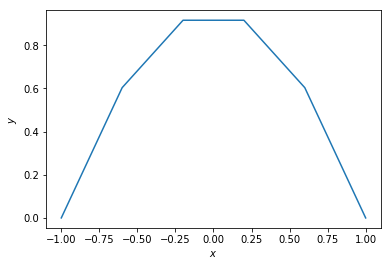

In [21]:
plt.plot(X, sol)
plt.xlabel('$x$')
plt.ylabel('$y$')

Найдем $p(x)$ и $f(x)$ для первого случая.

Разделим все уравнение на $a$ и преобразуем. Получим $y''+\frac{1+bx^2}{a}y=-\frac{1}{a}$. Тогда $p(x)=-\frac{1+bx^2}{a}$, $f(x)=-\frac{1}{a}$, или  $p(x)=-\frac{1+cos(k)x^2}{sin(k)}$, $f(x)=-\frac{1}{sin(k)}$

In [22]:
def px2(x):
    return - (1 + np.cos(K) * x * x) / np.sin(K)

In [23]:
def fx2(x):
    return (x - x) - 1 / np.sin(K)

In [24]:
X, sol2 = solve_de(px2, fx2, -1, 1)

[[ 1.          0.          0.         ...  0.          0.
   0.        ]
 [ 1.         -1.99998674  1.         ...  0.          0.
   0.        ]
 [ 0.          1.         -1.99998676 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... -1.99998676  1.
   0.        ]
 [ 0.          0.          0.         ...  1.         -1.99998674
   1.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]]
[ 0.00000000e+00 -6.67212849e-06 -6.67212849e-06 ... -6.67212849e-06
 -6.67212849e-06  0.00000000e+00]


Text(0, 0.5, '$y$')

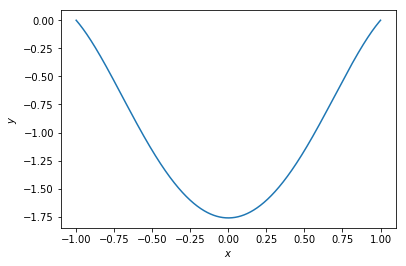

In [25]:
plt.plot(X, sol2)
plt.xlabel('$x$')
plt.ylabel('$y$')

In [26]:
np.max(sol)

0.9163772797453753

In [27]:
np.min(sol2)

-1.760668010082481

[[ 1.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.    ]
 [ 1.     -1.9344  1.      0.      0.      0.      0.      0.      0.
   0.      0.    ]
 [ 0.      1.     -1.9456  1.      0.      0.      0.      0.      0.
   0.      0.    ]
 [ 0.      0.      1.     -1.9536  1.      0.      0.      0.      0.
   0.      0.    ]
 [ 0.      0.      0.      1.     -1.9584  1.      0.      0.      0.
   0.      0.    ]
 [ 0.      0.      0.      0.      1.     -1.96    1.      0.      0.
   0.      0.    ]
 [ 0.      0.      0.      0.      0.      1.     -1.9584  1.      0.
   0.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      1.     -1.9536  1.
   0.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      0.      1.     -1.9456
   1.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      0.      0.      1.
  -1.9344  1.    ]
 [ 0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      1.    ]]
[ 0.   -0.04 -0.

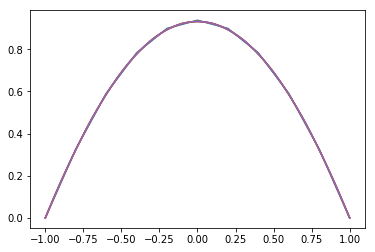

In [30]:
nset = [10, 20, 100, 200, 500]
for i in nset:
    X, solution = solve_de(px1, fx1, -1, 1, i)
    plt.plot(X, solution)

[[ 1.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 1.         -1.5642377   1.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          1.         -1.63812146  1.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          1.         -1.69089557  1.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          1.         -1.72256004  1.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          1.         -1.73311486
   1.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          1.
  -1.72256004  1.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   1.         -1.690895

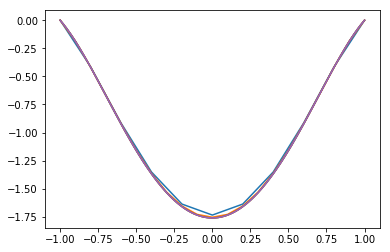

In [31]:
for i in nset:
    X, solution = solve_de(px2, fx2, -1, 1, i)
    plt.plot(X, solution)